In [1]:
import numpy as np
import matplotlib.pyplot as plt
#%config InlineBackend.figure_format = 'svg'
#plt.rcParams['figure.figsize'] = (10,4)
from IPython.display import Audio, Image
from scipy.signal import sawtooth, square
from scipy.io.wavfile import read
#import import_ipynb
#from Lesson4_sinusoids import hide_toggle
#hide_toggle()

### Frequency modulation (FM) and Vibrato
If AM modulation is like a tremolo effect, FM modulation when used as an LFO creates a vibrato effect.

Frequency modulation is slightly more complicated than amplitude modulation. One way of achieving the result (and allowing yourself to understand it) is with a loop function in python.

What we want to do is gradually change the frequency in Hz of the signal we are calculating as time increases. 
First, Here is an example of a "sweep" signal.

Let's first think about how we could change the frequency by modifying our existing formula for generating a sinusoid:

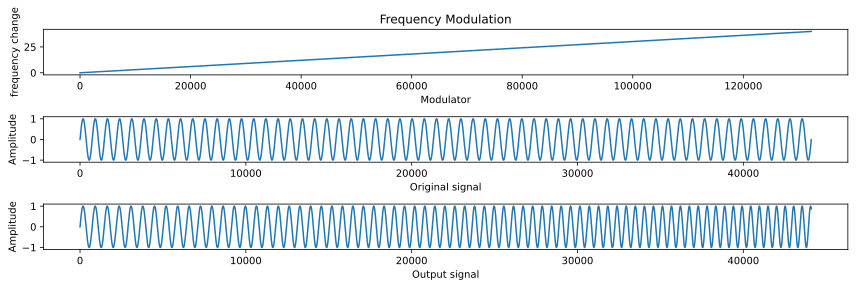

In [2]:
frequency_change = 40.0
carrier_frequency = 60.0

fs=44100
time = np.arange(0,3,1/fs) #time from 0 to three seconds with fs=44100

#create carrier for graphing purposes only:
carrier = np.sin(2.0 * np.pi * carrier_frequency * time)
#create linear change from zero to Delta frequency: 
modulator = np.linspace(0,frequency_change,len(carrier))
#add small increment of frequency in Hz at instantaneous time, t:
product = np.sin(2*np.pi*(carrier_frequency+modulator)*time)

plt.subplot(3, 1, 1)
plt.title('Frequency Modulation')
plt.plot(modulator) # Plot one: linear increase in frequency (i.e., the modulator)
plt.ylabel('frequency change')
plt.xlabel('Modulator')
plt.subplot(3, 1, 2)
plt.plot(carrier[:44100]) # Plot two: original frequency
plt.ylabel('Amplitude')
plt.xlabel('Original signal')
plt.subplot(3, 1, 3)
plt.plot(product[:44100]) # plot three: product of the two (i.e. Frequency modulated signal)
plt.ylabel('Amplitude')
plt.xlabel('Output signal')
plt.tight_layout()

In [3]:
Audio(product, rate=44100)

Notice in the above function I did not actually multiply two signals together. I simply *constructed* a sinusoid that was modulating at an accelerating pace. To do this in a cyclical fashion (as opposed to linear), we need to alternately extend and contract the frequency or phase of the original sinusoid in order to modify each frequency cycle.

Let's define some variables:

$C$ = Carrier frequency  
$M$ = Modulator frequency  
$\Delta f$ = frequency deviation (or depth of modulation)  
$I = \frac{\Delta(f)}{M}$ = modulation index  

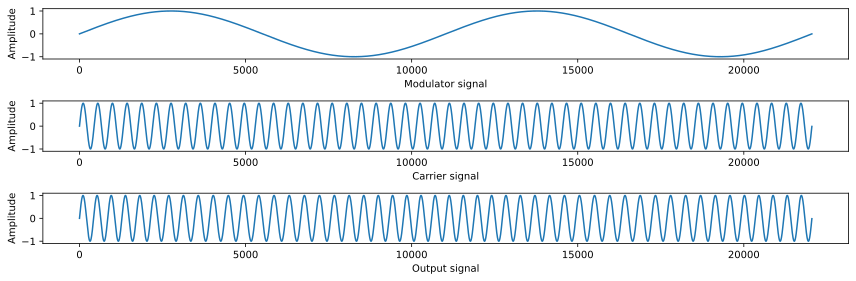

In [4]:
modulator_frequency = 4 #determines periodicity of frequency shift
carrier_frequency = 100 #determines fundamental (sometimes)
seconds = 3.0 
I = 1.0 #determines modulation index

time = np.arange(0,seconds*44100.0) / 44100.0  #time from 0 to three seconds with fs=44100
carrier = np.sin(2.0 * np.pi * carrier_frequency * time) # create carrier signal for display only
modulator = I * np.sin(2.0 * np.pi * modulator_frequency * time) # create modulator signal

product = np.zeros(len(modulator)) 
for i,t in enumerate(time):
    product[i] = np.sin(2. * np.pi * carrier_frequency * t + modulator[i])

plt.subplot(3, 1, 1)
#plt.title('Frequency Modulation')
plt.plot(modulator[:22050]) 
plt.ylabel('Amplitude')
plt.xlabel('Modulator signal')
plt.subplot(3, 1, 2)
plt.plot(carrier[:22050]) 
plt.ylabel('Amplitude')
plt.xlabel('Carrier signal')
plt.subplot(3, 1, 3)
plt.plot(product[:22050]) 
plt.ylabel('Amplitude')
plt.xlabel('Output signal')
plt.tight_layout()


In [5]:
Audio(product, rate=44100)


This effectively creates vibrato effect when the rate of modulation is slow (LFO).

The rate of the modulator (LFO) wave will determine the speed of the vibrato effect, and the depth (amplitude) of the modulator (relative to the carrier) will determine the intensity of the effect.

Modulator freq = rate of "vibrato" in Hz

How much the carrier deviates from its center frequency is known as the **frequency deviation**. The ratio of the frequency deviation to the modulating frequency is called the **modulation index** as defined above.

Notice that this "manual" implementation above is exactly the same as implementing FM using the familiar formula:

$$Asin(2\pi C_t + Isin(2\pi M_t))$$

Where the entire $Isin(2\pi M_t)$ is the phase offset term.

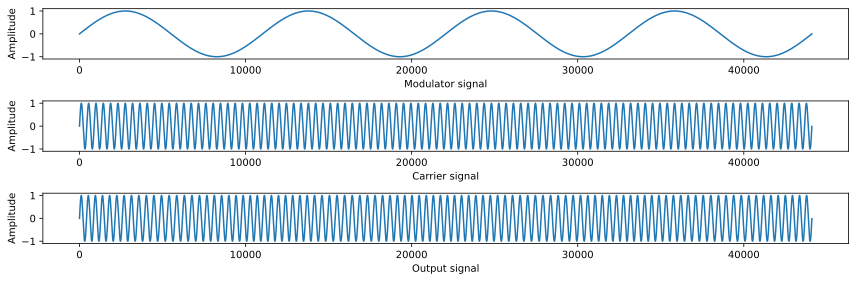

In [6]:
modulator_frequency = 4 
carrier_frequency = 100 
seconds = 3.0 
depth = 4.0 
I = depth/modulator_frequency
a = 1.0 

time = np.arange(0,seconds*44100.0) / 44100.0  #time from 0 to three seconds with fs=44100

carrier = np.sin(2.0 * np.pi * carrier_frequency * time) # create carrier signal
modulator = I * np.sin(2.0 * np.pi * modulator_frequency * time) # create modulator signal

#rewrite above code removing loop and using FM formula:
fm = a * np.sin(2*np.pi*carrier_frequency *time + (I*np.sin(2*np.pi*modulator_frequency*time)))

plt.subplot(3, 1, 1)
#plt.title('Frequency Modulation')
plt.plot(modulator[:44100]) 
plt.ylabel('Amplitude')
plt.xlabel('Modulator signal')
plt.subplot(3, 1, 2)
plt.plot(carrier[:44100]) 
plt.ylabel('Amplitude')
plt.xlabel('Carrier signal')
plt.subplot(3, 1, 3)
plt.plot(fm[:44100]) 
plt.ylabel('Amplitude')
plt.xlabel('Output signal')
plt.tight_layout()

In [7]:
Audio(fm, rate=44100)

When the modulator wave is relatively slow, we hear a vibrato effect. However, once the modulator rate increases into the audible frequency range ~20 Hz we begin to instead hear a change in the timbre of the sound (and possibly a change in the fundamental frequency). Below we will experiment with the relation between the rate of the modulator wave (M) and the carrier wave (C) in addition to the modulation index (I).

Recall:

$I = \frac{\Delta f}{f_{mod}}$ = modulation index  

*or*

$\Delta f = I * f_{mod}$ = Depth of modulation



We could construct our FM to calculate the modulation depth based on a fixed modulation index instead of manually passing a depth value. 

As $I$ increases, we increase the bandwidth of the spectrum (i.e., we get richer and richer sounds). These additional harmonic components will appear at intervals of $C\pm M$


In [56]:
modulator_frequency = 100 #determines periodicity of frequency shift
carrier_frequency = 200 #determines fundamental (sometimes)
seconds = 4.0 
I = 1.78
depth = I * modulator_frequency #determines frequency variation
a = 2.0 #determines carrier amplitude

time = np.arange(0,seconds*44100.0) / 44100.0  #time from 0 to three seconds with fs=44100

carrier = np.sin(2.0 * np.pi * carrier_frequency * time) # create carrier signal
modulator = I * np.sin(2.0 * np.pi * modulator_frequency * time) # create modulator signal

fm = a * np.sin(2*np.pi*carrier_frequency *time + (I*np.sin(2*np.pi*modulator_frequency*time)))

In [57]:
#carrier only
Audio(carrier, rate=44100)

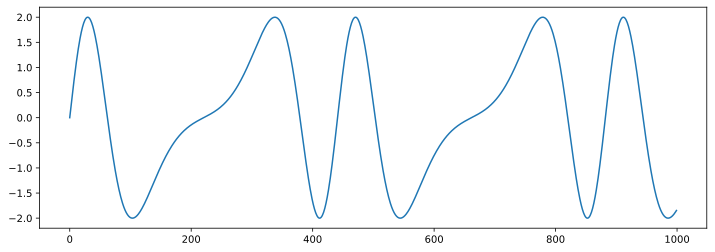

In [58]:
plt.plot(fm[:1000]);
Audio(fm, rate=44100)

By increasing the modulating frequency so that the ratio relative to the carrier is no longer an integer multiple, an inharmonic spectrum is produced:

In [12]:
modulator_frequency = 200 #determines periodicity of frequency shift
carrier_frequency = 100 
seconds = 3.0 
I = 1
depth = I * modulator_frequency
a = 1.0 #determines carrier amplitude
time = np.arange(0,seconds*44100.0) / 44100.0  #time from 0 to three seconds with fs=44100

carrier = np.sin(2.0 * np.pi * carrier_frequency * time) # create carrier signal
modulator = I * np.sin(2.0 * np.pi * modulator_frequency * time) # create modulator signal
fm = a * np.sin(2*np.pi*carrier_frequency *time + (I*np.sin(2*np.pi*modulator_frequency*time)))

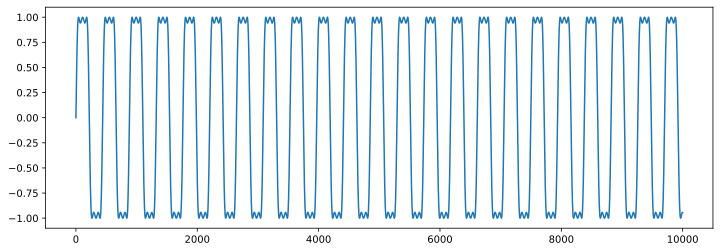

In [13]:
plt.plot(fm[:10000]);
Audio(fm, rate=44100)